In [2]:
import pandas as pd

In [9]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [10]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [11]:
data.shape

(200, 4)

In [12]:
import seaborn as sns
%matplotlib inline

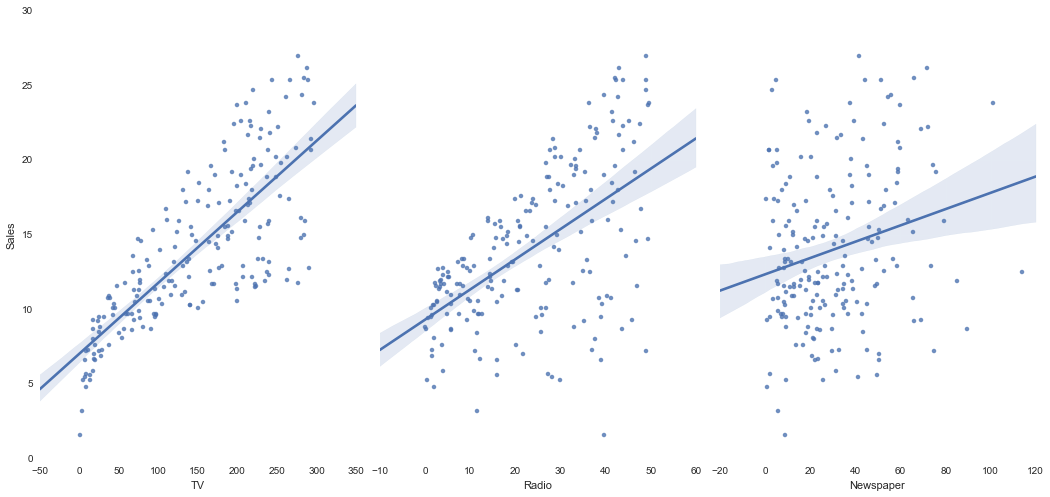

In [13]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], 
             y_vars='Sales', size=7, aspect=0.7,
            kind='reg')

In [14]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [15]:
y = data.Sales

In [16]:
print y.shape
print y.shape

(200,)

In [17]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
y_train.shape

(150,)

In [20]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print linreg.intercept_
print type(linreg.coef_)

2.87696662232
<type 'numpy.ndarray'>


In [25]:
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150253),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804204)]

In [27]:
y_pred = linreg.predict(X_test)

In [32]:
from sklearn import metrics
import numpy as np

In [36]:
print 'MSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print 'MSE', metrics.mean_squared_error(y_test, y_pred)
print 'RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MSE 1.40465142303
MSE 1.97304562023
RMSE 1.40465142303


In [39]:
feature_col2 = ['TV', 'Radio']

In [41]:
X2 = data[feature_col2]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state=1)

In [50]:
X2_train.shape

(150, 2)

In [51]:
linreg2 = LinearRegression()
f2 = linreg2.fit(X2_train, y2_train)

In [53]:
y2_pred = linreg2.predict(X2_test)

In [54]:
print 'RMSE', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))

RMSE 1.38790346994


In [55]:
from sklearn.linear_model import ElasticNet

In [56]:
en = ElasticNet()
en.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
y3_pred = en.predict(X_test)

In [58]:
print 'RMSE', np.sqrt(metrics.mean_squared_error(y_test, y3_pred))

RMSE 1.41293570366


In [67]:
en.score(X, y_test)

0.91462313844518262

In [68]:
from sklearn import datasets

In [72]:
housing = datasets.fetch_california_housing()

downloading Cal. housing from http://lib.stat.cmu.edu/modules.php?op=modload&name=Downloads&file=index&req=getit&lid=83 to /Users/claus/scikit_learn_data


In [75]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [81]:
housing.keys()

['data', 'feature_names', 'DESCR', 'target']

In [83]:
X = data
y = housing.target

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [85]:
en = ElasticNet()

In [87]:
en.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
p = en.predict(X_test)

In [90]:
print 'RMSE', np.sqrt(metrics.mean_squared_error(y_test, p))

RMSE 0.869745820364


In [91]:
en.coef_

array([  2.55658468e-01,   1.14396291e-02,   0.00000000e+00,
        -0.00000000e+00,   7.60070685e-06,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00])

In [92]:
zip(housing.feature_names, en.coef_)

[('MedInc', 0.25565846837362433),
 ('HouseAge', 0.011439629093081173),
 ('AveRooms', 0.0),
 ('AveBedrms', -0.0),
 ('Population', 7.6007068502779666e-06),
 ('AveOccup', -0.0),
 ('Latitude', -0.0),
 ('Longitude', -0.0)]

In [93]:
ln = LinearRegression()

In [94]:
ln.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
zip(housing.feature_names, ln.coef_)

[('MedInc', 0.44053710221167375),
 ('HouseAge', 0.0096588504869997843),
 ('AveRooms', -0.1047061853394067),
 ('AveBedrms', 0.62645346469571206),
 ('Population', -4.6232358175014561e-06),
 ('AveOccup', -0.0033738063011988918),
 ('Latitude', -0.42432684732797832),
 ('Longitude', -0.43920195082931246)]

In [96]:
pln = ln.predict(X_test)

In [97]:
print 'RMSE', np.sqrt(metrics.mean_squared_error(y_test, pln))

RMSE 0.731883381791


In [103]:
ln.score(X, y)

0.60608500875579763